In [1]:
import geopandas as gpd
import hexseg as HS

#### Load data

In [2]:
# filepaths
base = "https://raw.githubusercontent.com/routineactivity/hexseg/main/data"
districts = f"{base}/cleveland_districts.gpkg"
roads     = f"{base}/cleveland_roads.gpkg"
crimes    = f"{base}/cleveland_sample_data.gpkg"

gdf_districts = gpd.read_file(districts)
gdf_roads     = gpd.read_file(roads)
gdf_crimes    = gpd.read_file(crimes)

#### Generate Uber hexagons

In [3]:
hexes = HS.get_hexagons(gdf_districts, name_col="lad21nm", resolution=9)
hexes

,hex_id,geo_boundary,geometry
0,891946453b3ffff,Stockton-on-Tees,"POLYGON ((437416.465 509936.224, 437274.298 50..."
1,8919464517bffff,Stockton-on-Tees,"POLYGON ((437945.717 509689.657, 437803.561 50..."
2,8919464514fffff,Stockton-on-Tees,"POLYGON ((437735.044 509961.363, 437592.884 50..."
3,8919464514bffff,Stockton-on-Tees,"POLYGON ((437524.371 510233.067, 437382.208 51..."
4,89194645397ffff,Stockton-on-Tees,"POLYGON ((437313.698 510504.771, 437171.533 51..."
...,...,...,...
6531,89194602447ffff,Redcar and Cleveland,"POLYGON ((478114.897 519186.034, 477973.695 51..."
6532,891946545c3ffff,Stockton-on-Tees,"POLYGON ((450334.936 525925.886, 450193.169 52..."
6533,89194644307ffff,Stockton-on-Tees,"POLYGON ((442605.232 508039.47, 442463.166 507..."
6534,89194656107ffff,Hartlepool,"POLYGON ((453834.727 527061.621, 453693.045 52..."


#### Summarise crime and weights by hexagon

In [4]:
hex_both = HS.summarise_by_hex(
    hexes_gdf=hexes,
    crimes_gdf=gdf_crimes,
    count_col='any',
    weight_col='pseudo_harm'
    )

hex_both.sort_values('crime_count', ascending=False)

,hex_id,geo_boundary,geometry,crime_count,crime_weight
2188,89194654e33ffff,Middlesbrough,"POLYGON ((449564.202 520398.196, 449422.378 52...",726,177940.0
2247,89194654e17ffff,Middlesbrough,"POLYGON ((449461.285 520965.814, 449319.463 52...",702,323125.0
2244,89194654eabffff,Middlesbrough,"POLYGON ((449671.715 520694.456, 449529.896 52...",545,64950.0
2126,8919465483bffff,Middlesbrough,"POLYGON ((450719.322 518473.692, 450577.509 51...",506,55225.0
4621,891946cd97bffff,Hartlepool,"POLYGON ((450689.062 532855.189, 450547.353 53...",491,88830.0
...,...,...,...,...,...
885,891946463bbffff,Stockton-on-Tees,"POLYGON ((446767.218 512691.058, 446625.277 51...",0,0.0
6532,891946545c3ffff,Stockton-on-Tees,"POLYGON ((450334.936 525925.886, 450193.169 52...",0,0.0
6533,89194644307ffff,Stockton-on-Tees,"POLYGON ((442605.232 508039.47, 442463.166 507...",0,0.0
6534,89194656107ffff,Hartlepool,"POLYGON ((453834.727 527061.621, 453693.045 52...",0,0.0


#### Optional - add spatial lags

In [5]:
hex_lagged = HS.add_spatial_lag(
    hexes_gdf=hex_both,
    count_col='crime_count',
    weight_col='crime_weight',
    k=6
)

hex_lagged.sort_values('lag_sum_weight', ascending=False).head()

,hex_id,geo_boundary,geometry,crime_count,crime_weight,lag_sum_count,lag_mean_count,count_plus_sum,count_plus_mean,lag_sum_weight,lag_mean_weight,weight_plus_sum_sqrt,weight_plus_mean_sqrt
2191,89194654e07ffff,Middlesbrough,"POLYGON ((449353.768 520669.559, 449211.941 52...",121,30775.0,2500,416.666667,2621,537.666667,695445.0,115907.500000,852.185426,382.991514
2244,89194654eabffff,Middlesbrough,"POLYGON ((449671.715 520694.456, 449529.896 52...",545,64950.0,1752,292.000000,2297,837.000000,560905.0,93484.166667,791.109980,398.037896
2142,89194654e23ffff,Middlesbrough,"POLYGON ((449456.683 520101.922, 449314.855 51...",129,31685.0,2110,351.666667,2239,480.666667,443360.0,73893.333333,689.235083,324.928197
2303,89194654ebbffff,Middlesbrough,"POLYGON ((449779.224 520990.704, 449637.409 52...",38,6310.0,1335,222.500000,1373,260.500000,408220.0,68036.666667,643.840042,272.665852
2194,89194654e03ffff,Middlesbrough,"POLYGON ((449143.334 520940.922, 449001.505 52...",9,870.0,906,151.000000,915,160.000000,367995.0,61332.500000,607.342572,249.404290


#### Add global and local z-score and ranks to chosen measure

In [6]:
hex_stats = HS.add_spatial_stats(hex_lagged, col='weight_plus_mean_sqrt', group_col='geo_boundary')

hex_stats.sort_values('weight_plus_mean_sqrt_rank', ascending=True).head()

,hex_id,geo_boundary,geometry,crime_count,crime_weight,lag_sum_count,lag_mean_count,count_plus_sum,count_plus_mean,lag_sum_weight,lag_mean_weight,weight_plus_sum_sqrt,weight_plus_mean_sqrt,weight_plus_mean_sqrt_zscore,weight_plus_mean_sqrt_rank,weight_plus_mean_sqrt_zscore_by_geo_boundary,weight_plus_mean_sqrt_rank_by_geo_boundary
2247,89194654e17ffff,Middlesbrough,"POLYGON ((449461.285 520965.814, 449319.463 52...",702,323125.0,720,120.000000,1422,822.000000,104105.0,17350.833333,653.628335,583.503071,11.236575,1,6.625968,1
2188,89194654e33ffff,Middlesbrough,"POLYGON ((449564.202 520398.196, 449422.378 52...",726,177940.0,1670,278.333333,2396,1004.333333,306565.0,51094.166667,696.063934,478.575142,9.114626,2,5.241379,2
2144,89194654e3bffff,Middlesbrough,"POLYGON ((449246.245 520373.292, 449104.414 52...",438,114605.0,1534,255.666667,1972,693.666667,346820.0,57803.333333,679.282710,415.220825,7.833416,3,4.405380,3
2244,89194654eabffff,Middlesbrough,"POLYGON ((449671.715 520694.456, 449529.896 52...",545,64950.0,1752,292.000000,2297,837.000000,560905.0,93484.166667,791.109980,398.037896,7.485927,4,4.178641,4
2191,89194654e07ffff,Middlesbrough,"POLYGON ((449353.768 520669.559, 449211.941 52...",121,30775.0,2500,416.666667,2621,537.666667,695445.0,115907.500000,852.185426,382.991514,7.181645,5,3.980095,5


#### Visual inspection 

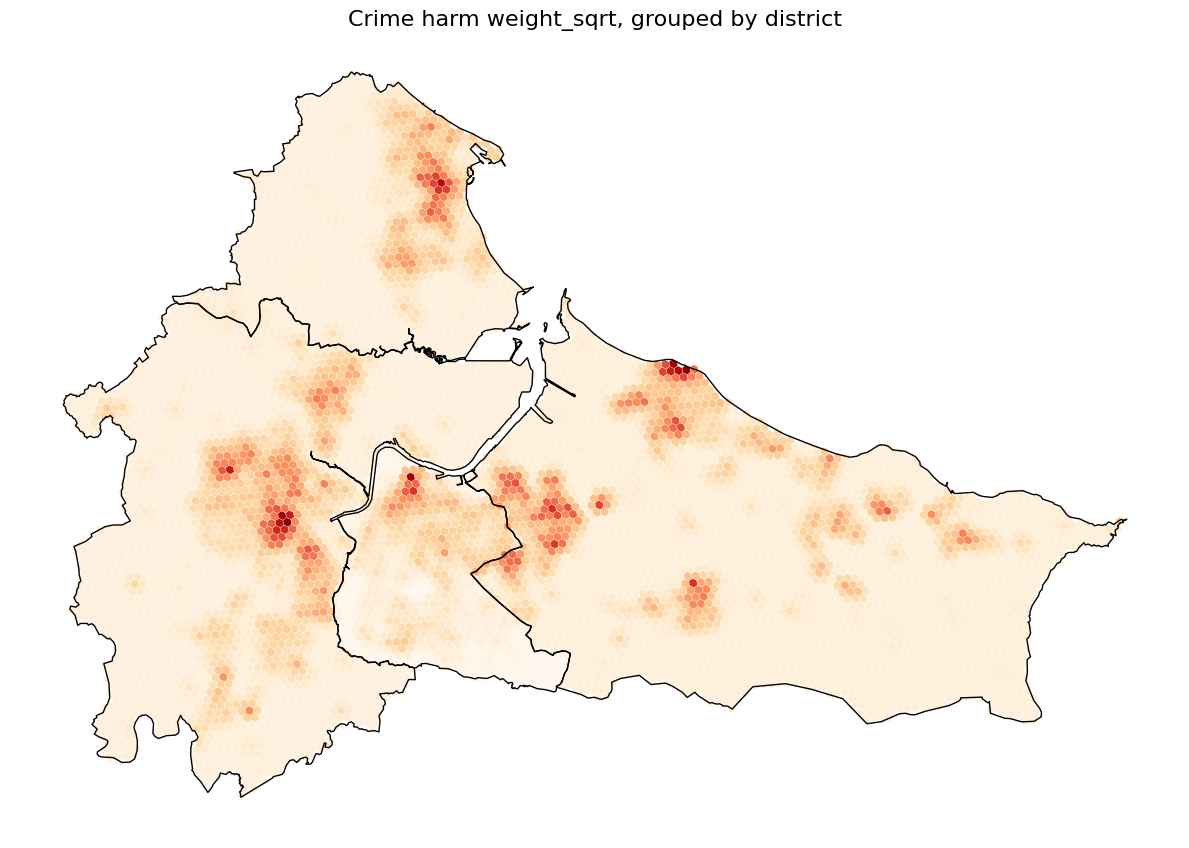

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 10))

hex_stats.plot(
    column="weight_plus_mean_sqrt_zscore_by_geo_boundary",
    cmap="OrRd",
    legend=False,
    edgecolor="white",
    linewidth=0.2,
    ax=ax
)

gdf_districts.plot(
    column='lad21nm',
    legend=False,
    edgecolor='black',
    linewidth=1,
    facecolor='none',  
    ax=ax               
)

ax.set_title("Crime harm weight_sqrt, grouped by district", fontsize=16)
ax.set_axis_off()

plt.tight_layout()
plt.show()


#### Simple folium map of results

In [8]:
m = HS.create_folium_map(
      hex_gdf=hex_stats,
      hex_query="weight_plus_mean_sqrt_rank_by_geo_boundary <= 20",
      seg_gdf=None,
      seg_query=None,
      district_gdf=gdf_districts,
      district_query=None) 
      
m